<a href="https://colab.research.google.com/github/alepiere/CSC313_DataMine/blob/main/DataMiningPt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

!curl https://calpoly.fun/ft/S19_All_Release_2_10_22.zip > data.zip
!unzip data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8179k  100 8179k    0     0  5617k      0  0:00:01  0:00:01 --:--:-- 5618k
Archive:  data.zip
   creating: S19_All_Release_2_10_22/
  inflating: __MACOSX/._S19_All_Release_2_10_22  
  inflating: S19_All_Release_2_10_22/.DS_Store  
  inflating: __MACOSX/S19_All_Release_2_10_22/._.DS_Store  
  inflating: S19_All_Release_2_10_22/late.csv  
  inflating: __MACOSX/S19_All_Release_2_10_22/._late.csv  
  inflating: S19_All_Release_2_10_22/early.csv  
  inflating: __MACOSX/S19_All_Release_2_10_22/._early.csv  
   creating: S19_All_Release_2_10_22/Data/
  inflating: __MACOSX/S19_All_Release_2_10_22/._Data  
   creating: S19_All_Release_2_10_22/Data/LinkTables/
  inflating: __MACOSX/S19_All_Release_2_10_22/Data/._LinkTables  
   creating: S19_All_Release_2_10_22/Data/CodeStates/
  inflating: __MACOSX/S19_All_Release_2_10_22/Data/._CodeSt

In [ ]:
main_table = pd.read_csv("S19_All_Release_2_10_22/Data/MainTable.csv")
Subject = pd.read_csv("S19_All_Release_2_10_22/Data/LinkTables/Subject.csv")
early_df = pd.read_csv("S19_All_Release_2_10_22/early.csv")
late_df = pd.read_csv("S19_All_Release_2_10_22/late.csv")

**Leading Research Questions**


1.   Does early programming performance predict final exam scores?
2.   Can we predict student struggles on later programming problems using early performance data?
3.  Can we identify students at risk of dropping the course based on their early programming performance?



   AssignmentID  DropCount
0         439.0        386
2         492.0        361
1         487.0        340
3         494.0        315
4         502.0        306


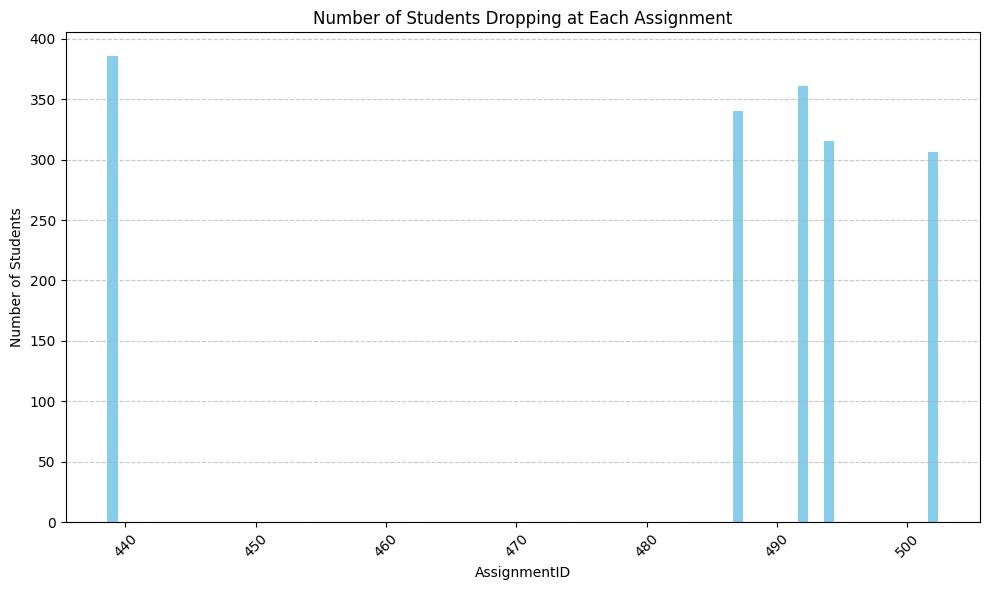

In [ ]:
# Count the number of unique students for each assignment
assignment_drop_count = main_table.groupby('AssignmentID')['SubjectID'].nunique().reset_index(name='DropCount')

# Sort the assignments by the number of students
assignment_drop_count = assignment_drop_count.sort_values(by='DropCount', ascending=False)

# Display the assignment drop count
print(assignment_drop_count)

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(assignment_drop_count['AssignmentID'], assignment_drop_count['DropCount'], color='skyblue')
plt.xlabel('AssignmentID')
plt.ylabel('Number of Students')
plt.title('Number of Students Dropping at Each Assignment')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This graph demonstrates that a majority of students drop out after the first assingment. There could be many reasons for this, let's explore them.

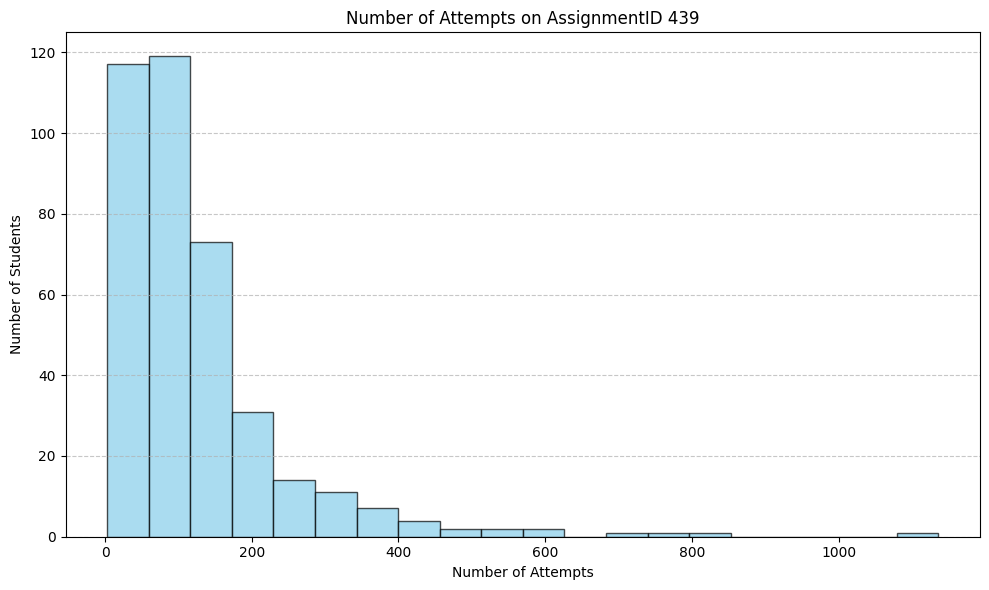

In [ ]:

# Filter data for AssignmentID 439
assignment_439 = main_table[main_table['AssignmentID'] == 439]

# Count the number of attempts made by each student on AssignmentID 439
attempts_439 = assignment_439.groupby('SubjectID').size()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.hist(attempts_439, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Attempts')
plt.ylabel('Number of Students')
plt.title('Number of Attempts on AssignmentID 439')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Here we see that most students did struggle the most on the first few assignments.



We have come up with some hypothesis as to why most students drop after the first assingment:



1.   Difficulty Level: The first assignment might have been more challenging than expected, leading to frustration and loss of motivation among students.
2.   Lack of Confidence: Students may have lacked confidence in their programming abilities after the first assignment. If they struggled significantly or received poor grades, they might have doubted their ability to succeed in the course.
3.  High Expectations: Students might have had high expectations for their performance in the course, and when they didn't meet these expectations on the first assignment, they became discouraged and decided to drop the course.
4.   Inadequate Support: Students may have felt that they did not receive adequate support or guidance from the instructor or teaching assistants, making it difficult for them to succeed in the course.


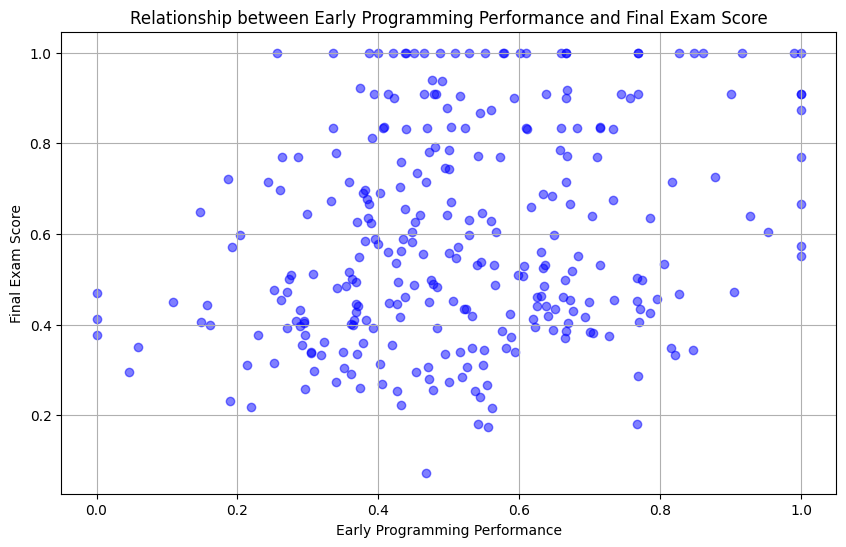

Correlation Coefficient: 0.24604777145701898


In [ ]:

# Filter data for early assignments (e.g., AssignmentID 439)
early_assignments = main_table[main_table['AssignmentID'] == 439]

# Filter data for final exam scores (e.g., AssignmentID 502)
final_exam = main_table[main_table['AssignmentID'] == 502]

# Merge early assignment scores and final exam scores for each student
merged_data = pd.merge(early_assignments.groupby('SubjectID')['Score'].mean().reset_index(),
                       final_exam.groupby('SubjectID')['Score'].mean().reset_index(),
                       on='SubjectID', suffixes=('_early', '_final'), how='inner')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Score_early'], merged_data['Score_final'], color='blue', alpha=0.5)
plt.xlabel('Early Programming Performance')
plt.ylabel('Final Exam Score')
plt.title('Relationship between Early Programming Performance and Final Exam Score')
plt.grid(True)
plt.show()


# Calculate the correlation coefficient
correlation_coefficient = merged_data['Score_early'].corr(merged_data['Score_final'])

print("Correlation Coefficient:", correlation_coefficient)


This scatter plot will help visualize the relationship between early programming performance (average score on early assignments) and final exam scores for all students. As you can see, there is not real linear relationship between the two. We calculated the correlation coefficient. While it is positive (which means that as early programming performance increases, final exam scores also tend to increase), it is small (the relationship is not very strong)



Our analysis revealed several important insights into student performance and course retention.

Firstly, we found that a significant number of students drop out after the first assignment, which may indicate that they struggle to adapt to the course's difficulty or feel overwhelmed by the workload.

However, after more research, we found that it was common for students to struggle on the first assignment. The first assignment also had the highest number of attempts, which suggests that students may find it particularly challenging. This may be because programming is often new to beginners, and they require time and support to adapt and develop the necessary skills.

Additionally, our exploration of the relationship between early programming performance and final exam scores showed a weak correlation, indicating that early performance may not be a strong predictor of final exam success. So while most students struggle on the first assignment, it is not a good predictor to this success in the class. Rather, a better predictor to success is whether a student stays in the class after the first assignment.

We found that it is crucial to provide adequate support and resources to students early in the course, especially after the first assignment, to help them overcome challenges and build confidence.